In [521]:
#Importing

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import sqlite3
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from wordcloud import WordCloud
import re
import os
from sqlalchemy import create_engine # database connection
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from datetime import datetime
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances
from sklearn.linear_model import SGDClassifier
#from sklearn.externals import joblib
import scipy.sparse
import pickle
from tqdm import tqdm
from bs4 import BeautifulSoup

In [522]:
#Get the data

stack_data = pd.read_csv("train.csv")
stack_data.shape

(45000, 6)

In [523]:
#See how the data looks

stack_data.head(10)

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ
5,34554026,Accessing pointer member of the structure usin...,<p>I have defined integer pointer inside the s...,<c><pointers><data-structures>,2016-01-01 06:21:17,LQ_CLOSE
6,34554206,"How To Disable 2nd Saturday 4th Saturday ,Sund...","i want to Disable 2nd Saturday 4th saturday,...",<javascript><jquery><jquery-ui>,2016-01-01 06:55:18,LQ_EDIT
7,34554671,Resizing containers in bootstrap,I am new to bootstrap and i would like to find...,<jquery><html><css><twitter-bootstrap>,2016-01-01 08:32:05,LQ_EDIT
8,34554871,Changing Theme in Windows 10 UWP App Programma...,<p>I was able to change theme using <code>this...,<c#><windows-10><windows-10-mobile><windows-10...,2016-01-01 09:05:45,HQ
9,34554982,TextBox Value Disappears VB6,I my case I am having two form Form 1 and Form...,<vb6>,2016-01-01 09:27:44,LQ_EDIT


In [524]:
stack_data.shape

(45000, 6)

In [525]:
#See if data is dublicated
stack_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
44995    False
44996    False
44997    False
44998    False
44999    False
Length: 45000, dtype: bool

In [526]:
#Remove the dublicates
stack_data.drop_duplicates()

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ
...,...,...,...,...,...,...
44995,60461435,Convert List<String> to string C# - asp.net - ...,<p>I am new to this and I am asking for help t...,<c#><asp.net><sql-server>,2020-02-29 02:22:18,LQ_CLOSE
44996,60461754,Does Python execute code from the top or botto...,<p>I am working on learning Python and was won...,<python>,2020-02-29 03:33:59,LQ_CLOSE
44997,60462001,how to change payment date in Azure?,<p>It looks like it costs 8 days per month in ...,<azure><billing>,2020-02-29 04:34:16,LQ_CLOSE
44998,60465318,how to implement fill in the blank in Swift,"<p>""I _____ any questions.""</p>\n\n<p>I want t...",<ios><swift>,2020-02-29 12:50:43,LQ_CLOSE


In [527]:
#lets drop id, date and y
#stack_data.drop('')
stack_data.drop(['Id', 'CreationDate','Y'], axis=1, inplace=True)

In [528]:
#After dropping
stack_data.head(10)

,Title,Body,Tags
0,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>
1,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>
2,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...
3,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...
4,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...
5,Accessing pointer member of the structure usin...,<p>I have defined integer pointer inside the s...,<c><pointers><data-structures>
6,"How To Disable 2nd Saturday 4th Saturday ,Sund...","i want to Disable 2nd Saturday 4th saturday,...",<javascript><jquery><jquery-ui>
7,Resizing containers in bootstrap,I am new to bootstrap and i would like to find...,<jquery><html><css><twitter-bootstrap>
8,Changing Theme in Windows 10 UWP App Programma...,<p>I was able to change theme using <code>this...,<c#><windows-10><windows-10-mobile><windows-10...
9,TextBox Value Disappears VB6,I my case I am having two form Form 1 and Form...,<vb6>


In [529]:
import html
from spacy.lang.en.stop_words import STOP_WORDS


#Now we clean the dataset
def data_cleaning(text):
    #Removing Html tag
    def escaping_html_char(text):
        
        parse_text = html.unescape(text)
        return parse_text
    #Here we clean the data
    def clean(text):
        
        text = re.sub('[^\w\s]'," ", text.lower())
        #text = " ".join([word for word in text.split() if word not in STOP_WORDS])
        return text
    
    text = escaping_html_char(text)
    text = clean(text)
    return text

In [530]:
stack_data['Tags'] = stack_data['Tags'].apply(data_cleaning)
stack_data.head()

,Title,Body,Tags
0,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,java repeat
1,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,java optional
2,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,javascript image overlay react native opa...
3,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",swift operators whitespace ternary operato...
4,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,android material design floating action but...


In [531]:
new_tags = []
for i in tqdm(range(stack_data.shape[0])):
    j = stack_data.Tags.iloc[i].split()[0]
    new_tags.append(j)

100%|████████████████████████████████████████████████████████████████████████| 45000/45000 [00:00<00:00, 121139.88it/s]


In [532]:
stack_data.Tags = new_tags
stack_data.head()

,Title,Body,Tags
0,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,java
1,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,java
2,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,javascript
3,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",swift
4,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,android


In [533]:
labels = {"c#" : 0, "java" : 1, "c++" : 2, "c" : 3, "ios" : 4, "javascript" : 5, "python" : 6, "php" : 7}
labels_map = { 0 : "c#" , 1 : "java" , 2 : "c++" , 3 : "c", 4 : "ios", 5 : "javascript", 6 : "python", 7 : "php"}

In [534]:
#Here we replace the tags with numbers#
stack_data["Tags"] = stack_data["Tags"].map(labels)
stack_data.head()

,Title,Body,Tags
0,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,1.0
1,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,1.0
2,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,5.0
3,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",NaN
4,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,NaN


In [536]:
#Lets drop those tags that i am not checking atn
new_stack_data = stack_data.dropna()
new_stack_data.head()

,Title,Body,Tags
0,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,1.0
1,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,1.0
2,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,5.0
5,Accessing pointer member of the structure usin...,<p>I have defined integer pointer inside the s...,3.0
6,"How To Disable 2nd Saturday 4th Saturday ,Sund...","i want to Disable 2nd Saturday 4th saturday,...",5.0


In [537]:
new_stack_data.shape

(25742, 3)

In [538]:
#Lets split the x and y
X = new_stack_data.Title.values
y = new_stack_data.Tags.values

In [539]:
#Now we test split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify = y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.25, stratify = y_train)
X_train.shape, X_test.shape, X_cv.shape


((15444,), (5149,), (5149,))

In [540]:
#Transform the data to a matrix for easy ml manipulation
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)
X_cv = tfidf.transform(X_cv)
X_test = tfidf.transform(X_test)
X_train.shape, X_cv.shape, X_test.shape

((15444, 10336), (5149, 10336), (5149, 10336))

In [541]:
from sklearn.metrics import accuracy_score
score_train = []
score_cv = []
for i in ([1e-9, 1e-8, 1e-7, 1e-6, 0.00001, 0.0001, 0.001, 0.01, 0.1]):
    clf = SGDClassifier(alpha = i, loss = "log", class_weight="balanced", n_jobs=-1)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_train)
    y_predict_cv = clf.predict(X_cv)
    score_train.append(accuracy_score(y_train, y_predict))
    score_cv.append(accuracy_score(y_cv, y_predict_cv))

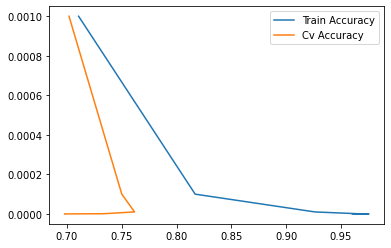

In [542]:
import matplotlib.pyplot as plt
lis = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001]
plt.plot(score_train[:-2], lis, label = "Train Accuracy")
plt.plot(score_cv[:-2], lis, label = "Cv Accuracy")
plt.legend()
plt.show()

In [543]:
best_alpha = 1e-7

In [544]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
clf = SGDClassifier(alpha = best_alpha, loss = "log", class_weight="balanced", n_jobs=-1)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
acc = accuracy_score(y_test, y_predict)
cm = confusion_matrix(y_test, y_predict)
print("The Accuracy of model is : ", acc)

The Accuracy of model is :  0.6820741891629443


<AxesSubplot:>

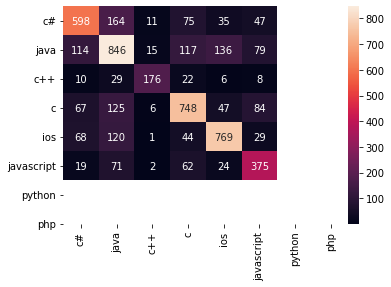

In [545]:
x_ax = ["c#", "java", "c++", "c", "ios", "javascript", "python", "php"]
y_ax = ["c#", "java", "c++", "c", "ios", "javascript", "python", "php"]
sns.heatmap(cm, annot = True, fmt="d", xticklabels=x_ax, yticklabels=y_ax)

In [546]:
score_train = []
score_cv = []
for i in ([1e-9, 1e-8, 1e-7, 1e-6, 0.00001, 0.0001]):
    clf = SGDClassifier(alpha = i, class_weight="balanced", n_jobs=-1)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_train)
    y_predict_cv = clf.predict(X_cv)
    score_train.append(accuracy_score(y_train, y_predict))
    score_cv.append(accuracy_score(y_cv, y_predict_cv))

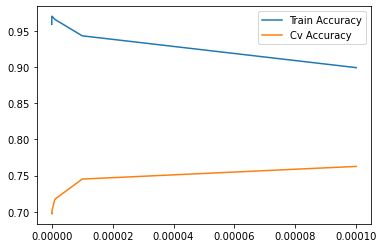

In [547]:
lis = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001]
plt.plot(lis, score_train, label = "Train Accuracy")
plt.plot(lis, score_cv, label = "Cv Accuracy")
plt.legend()
plt.show()

In [548]:
best_alpha = 1e-6

The Accuracy of model is :  0.7013012235385512


<AxesSubplot:>

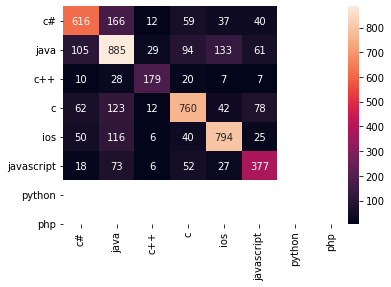

In [549]:
clf = SGDClassifier(alpha = best_alpha, class_weight="balanced", n_jobs=-1)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
acc = accuracy_score(y_test, y_predict)
cm = confusion_matrix(y_test, y_predict)
print("The Accuracy of model is : ", acc)
sns.heatmap(cm, annot = True, fmt="d", xticklabels=x_ax, yticklabels=y_ax)

In [550]:
tfidf = TfidfVectorizer()
data = tfidf.fit_transform(new_stack_data.Title)
data.shape

(25742, 13623)

In [551]:
scipy.sparse.save_npz('data.npz', data)

In [552]:
data = scipy.sparse.load_npz('data.npz')

In [553]:
y = stack_data.Tags.values
pd.to_pickle(y, r"C:\Users\Alex Meta Ndung'u\Documents\Machine Learning\Machine Learning Search\y")

In [554]:
filename = 'y'
infile = open(filename,'rb')
y = pickle.load(infile)

In [555]:
clf_final = SGDClassifier(alpha = 1e-7, loss = "log", class_weight="balanced", n_jobs=-1)
clf_final.fit(data, y)

SGDClassifier(alpha=1e-07, class_weight='balanced', loss='log', n_jobs=-1)

In [556]:
def process_query(query):
    preprocessed_reviews = []
    sentance = re.sub("\S*\d\S*", "", query).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords.words('english'))
    preprocessed_reviews.append(sentance.strip())
    return preprocessed_reviews

def tfidf_search(query):
    query = process_query(query)
    query_trans = tfidf.transform(query)
    pairwise_dist = pairwise_distances(data, query_trans)
    
    indices = np.argsort(pairwise_dist.flatten())[0:10]
    df_indices = list(new_stack_data.index[indices])
    return df_indices


def label(query):
    query = process_query(query)
    query = tfidf.transform(query)
    ans = clf_final.predict(query)
    #ans = clf.predict(query)
    return labels_map[ans[0]]


def change_query(query):
    tag = label(query)
    return query + " " + tag

In [557]:
stack_data.shape

(25742, 3)

In [558]:
def enter_queries(query) : 
    print("The Query is :", query)
    query = change_query(query)
    df_indices = tfidf_search(query)
    print("The Model Interpreted Query is :", query)
    print("Top Results : ")
    for i in (df_indices):
        print(i)
        print("Title : ", new_stack_data.Title.iloc[i])

In [559]:
query = "function"
enter_queries(query)

The Query is : function
The Model Interpreted Query is : function c
Top Results : 
19284
Title :  Comparing ENUMS
36231


IndexError: single positional indexer is out-of-bounds